<a href="https://colab.research.google.com/github/yashgokhale/Data-Analysis-ML-of-Cloud-Data/blob/master/DecisionTree_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Master_File_LWC.csv')
data=data.drop(columns=['Unnamed: 0'])

In [4]:
#!pip install tensorflow==2.3.0
#!pip install --upgrade tensorflow

In [5]:
from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
y=np.reshape(y,(-1,1))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=19)
batch_size =len(X_train)
print(X_train.shape, y_train.shape,y_test.shape )

(1344802, 5) (1344802, 1) (336201, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Train
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# test
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
# Train
y_train_scaled = scaler.fit_transform(y_train.astype(np.float64))
# test
y_test_scaled = scaler.fit_transform(y_test.astype(np.float64))

In [7]:
FEATURES=list(data.columns[:-1])
OUTPUT=['LWC']

In [8]:
from sklearn.preprocessing import MinMaxScaler
X_train_d=pd.DataFrame(X_train_scaled,columns=FEATURES)
X_test_d=pd.DataFrame(X_test_scaled,columns=FEATURES)
y_train_d=pd.DataFrame(y_train_scaled,columns=OUTPUT)['LWC']
y_test_d=pd.DataFrame(y_test_scaled,columns=OUTPUT)['LWC']

In [9]:
import tensorflow as tf
feature_col=[tf.feature_column.numeric_column(x) for x in FEATURES]
#feature_col=feature_col+[tf.feature_column.numeric_column('LWC')]

In [10]:
opti = tf.optimizers.Adam(learning_rate = 0.01)
input_func= tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train_d, 
                                                y= y_train_d, 
                                                batch_size=10, 
                                                num_epochs=1000, 
                                                shuffle=True)

In [11]:
test_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x= X_test_d,                                                   
                                                 batch_size=100, 
                                                 num_epochs=1, 
                                                 shuffle=False)
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_test_d,
                                                      y=y_test_d, 
                                                      batch_size=10, 
                                                      num_epochs=1, 
                                                      shuffle=False)

In [12]:
estimator = tf.estimator.DNNRegressor(hidden_units=[3,2,1], feature_columns=feature_col, optimizer=opti, dropout=0.5)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpatmvdfy7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
estimator.train(input_fn=input_func,steps=20000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-13T17:12:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpatmvdfy7/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 50.46708s
INFO:tensorflow:Finished evaluation at 2020-10-13-17:13:02
INFO:tensorflow:Saving dict for global step 20000: average_loss = 0.004777319

Text(0, 0.5, 'predicted values')

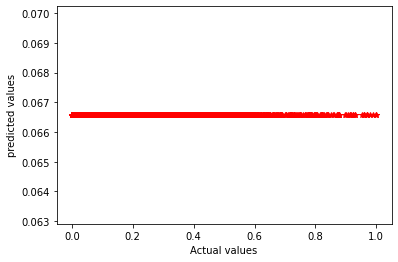

In [14]:
result_eval = estimator.evaluate(input_fn=eval_input_func)
predictions=[]
for pred in estimator.predict(input_fn=test_input_func):
    predictions.append(np.array(pred['predictions']).astype(float))
plt.plot(y_test_d, predictions, 'r*')
plt.xlabel('Actual values')
plt.ylabel('predicted values')

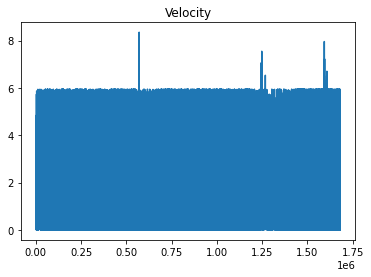

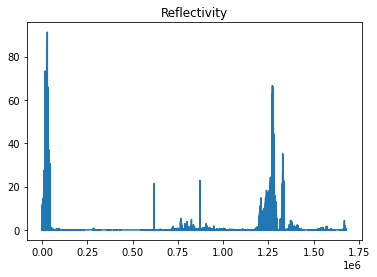

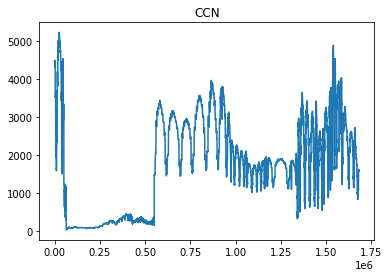

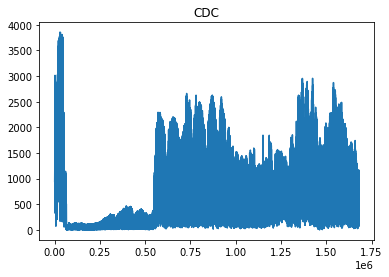

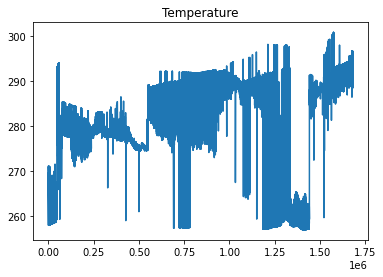

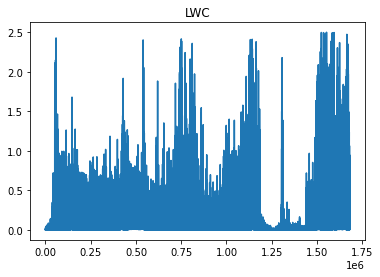

In [15]:
for x in data.columns:
  plt.plot(data[x])
  plt.title(x)
  plt.show()

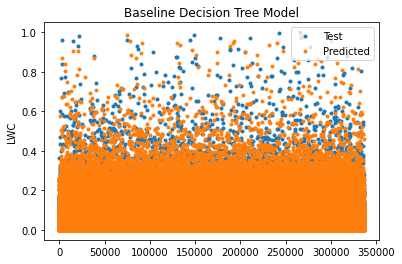

In [18]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train_scaled, y_train_scaled)
y_pred = regressor.predict(X_test_scaled)
r_dt=regressor.score(X_test_scaled,y_test_scaled)
plt.plot(y_test_scaled,'.',label='Test')
plt.plot(y_pred,'.',label='Predicted')
plt.legend()
plt.ylabel('LWC')
plt.title('Baseline Decision Tree Model')
plt.show()

In [19]:
print(f'R^2 for Baseline Decision Tree without tuning={r_dt:1.3f}')

R^2 for Baseline Decision Tree without tuning=0.510


In [24]:
dep=np.linspace(1,10,10)
dep=list(dep)+[None]
from sklearn.tree import DecisionTreeRegressor 
r2=[]
for r in dep: 
  regressor = DecisionTreeRegressor(random_state=0,max_depth=r)
  regressor.fit(X_train_scaled, y_train_scaled)
  y_pred = regressor.predict(X_test_scaled)
  r_dt=regressor.score(X_test_scaled,y_test_scaled)
  r2.append(r_dt)
  print(f'For {r} depth: R^2={r_dt:1.2f}')
#plt.plot(y_test_scaled,'.',label='Test')
#plt.plot(y_pred,'.',label='Predicted')
#plt.legend()
#plt.ylabel('LWC')
#plt.title('Baseline Decision Tree Model')
#plt.show()

For 1.0 depth: R^2=0.15
For 2.0 depth: R^2=0.20
For 3.0 depth: R^2=0.23
For 4.0 depth: R^2=0.26
For 5.0 depth: R^2=0.29
For 6.0 depth: R^2=0.30
For 7.0 depth: R^2=0.34
For 8.0 depth: R^2=0.36
For 9.0 depth: R^2=0.40
For 10.0 depth: R^2=0.43
For None depth: R^2=0.51


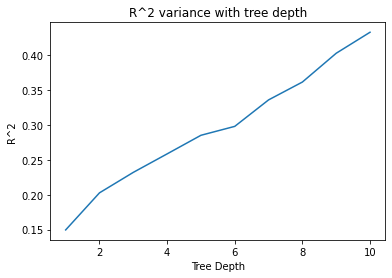

In [26]:
plt.plot(dep,r2)
plt.xlabel('Tree Depth')
plt.ylabel('R^2')
plt.title('R^2 variance with tree depth')
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
X_scaled= scaler.fit_transform(X.astype(np.float64))
y_scaled = scaler.fit_transform(y.astype(np.float64))
depth = []
for i in range(1,10):
  print(i)
  reg = tree.DecisionTreeRegressor(max_depth=i)
  # Perform 5-fold cross validation 
  scores = cross_val_score(estimator=reg, X=X_scaled, y=y_scaled, cv=5, n_jobs=4)
  depth.append((i,scores.mean()))
print(depth)

1
2
3
4
5
6
7
8
9
[(1, -0.016327018619199586), (2, -0.19308944421929333), (3, -0.3372117563888847), (4, -0.08730255667579742), (5, -0.1179651565634269), (6, -0.17567346353852145), (7, -0.155400880310883), (8, -0.34654583936770966), (9, -0.3439810157273419)]


In [30]:
# Grid Search CV

In [32]:
X_train_scaled,y_train_scaled,X_test_scaled,y_test_scaled
print('Works')

Works


In [33]:
from sklearn.metrics import mean_squared_error
source='https://www.kaggle.com/shotashimizu/09-decisiontree-gridsearchcv'
def root_mean_squared_error(y_true, y_pred):
  return np.sqrt(mean_squared_error(y_true, y_pred))

In [34]:
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)
pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

In [45]:
depths=[2,5,10,15]
num_leafs=[1, 5, 10, 20, 50, 100]

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]

In [47]:
gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=10)
gs = gs.fit(X_train_scaled, y_train_scaled)

In [48]:
print(-gs.best_score_)
print(gs.best_params_)
my_model = gs.best_estimator_
my_model.fit(X_train_scaled, y_train_scaled)
y_predicted = my_model.predict(X_test)
root_mean_squared_error(y_test, y_predicted)

0.04100676998845566
{'decisiontreeregressor__max_depth': 15, 'decisiontreeregressor__min_samples_leaf': 10}


0.17448286651349215

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predicted)

-0.10074490377254586

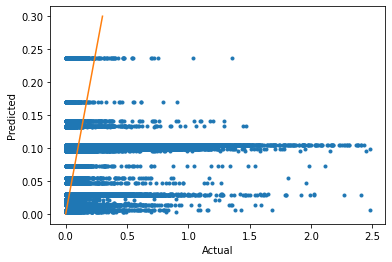

In [53]:
plt.plot(y_test,y_predicted,'.')
plt.plot([0,0.2,0.3],[0,0.2,0.3])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

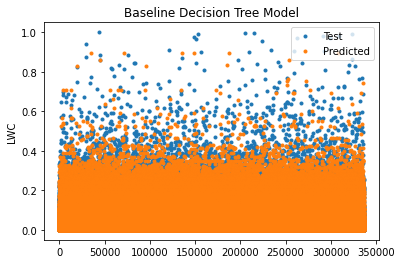

In [60]:
from sklearn.tree import DecisionTreeRegressor  
regressor_univ = DecisionTreeRegressor(random_state = 0,max_depth=15,min_samples_leaf=10)  
regressor_univ.fit(X_train_scaled, y_train_scaled)
y_pred = regressor_univ.predict(X_test_scaled)
r_dt=regressor_univ.score(X_test_scaled,y_test_scaled)
plt.plot(y_test_scaled,'.',label='Test')
plt.plot(y_pred,'.',label='Predicted')
plt.legend()
plt.ylabel('LWC')
plt.title('Baseline Decision Tree Model')
plt.show()

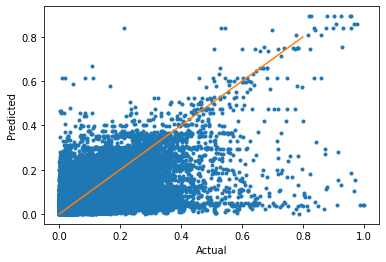

In [57]:
plt.plot(y_test_scaled,y_pred,'.')
plt.plot([0,0.2,0.3,0.5,0.8],[0,0.2,0.3,0.5,0.8])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [59]:
print(f'Testing on random Test Train Splits')
cases=[0,10,12,34,56,190,200]
for c in cases:
  X=data.iloc[:,:-1].values
  y=data.iloc[:,-1].values
  y=np.reshape(y,(-1,1))
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=c) 
  scaler = MinMaxScaler()
  # Train
  X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
  # test
  X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
  # Train
  y_train_scaled = scaler.fit_transform(y_train.astype(np.float64))
  # test
  y_test_scaled = scaler.fit_transform(y_test.astype(np.float64))
  regressor = DecisionTreeRegressor(random_state = 0,max_depth=15,min_samples_leaf=10)  
  regressor.fit(X_train_scaled, y_train_scaled)
  y_pred = regressor.predict(X_test_scaled)
  r_dt=regressor.score(X_test_scaled,y_test_scaled)
  print(f'For case {c}, R^2:{r_dt:1.2f}')

Testing on random Test Train Splits
For case 0, R^2:0.60
For case 10, R^2:0.62
For case 12, R^2:0.49
For case 34, R^2:0.62
For case 56, R^2:0.52
For case 190, R^2:0.50
For case 200, R^2:0.60


In [62]:
print('Testing performance of one regressor on total set')
y_pred = regressor.predict(X_scaled)
r_dt=regressor.score(X_scaled,y_scaled)
print(f'For total case: R^2:{r_dt:1.2f}')

Testing performance of one regressor on total set
For total case: R^2:0.62
